In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Data
df_train = pd.read_csv('/home/sh0brun/Documents/Untitled Folder/train.csv')
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [3]:
#Take sample feature
sample_df_train = df_train[['LotArea','GarageArea','SalePrice']]
print(sample_df_train.head())

   LotArea  GarageArea  SalePrice
0     8450         548     208500
1     9600         460     181500
2    11250         608     223500
3     9550         642     140000
4    14260         836     250000


In [4]:
#Clean Data
sample_df_train = sample_df_train.dropna()

In [5]:
y_sample = sample_df_train['SalePrice']
sample_df_train = sample_df_train.drop('SalePrice',axis = 1)
# test = pd.merge(sample_df_train,y_sample,right_index = True,left_index = True)
# test

# Normalization
### Formula Transformation
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
<br> X_scaled = X_std * (max - min) + min
<br> nb: max and min given by feature_range

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1),copy=True)
x_scaled = scaler.fit_transform(sample_df_train)

x_sample = pd.DataFrame(x_scaled)
sampled = pd.merge(x_sample,y_sample,right_index = True, left_index = True)

# Create Train and Test Set from train.csv

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sampled,test_size = 0.3)
# print(train)
# print(test)
x_train = train.drop('SalePrice',axis = 1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']

# Predict

In [8]:
#Import support library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [9]:
K = 3
# Make the model
model = neighbors.KNeighborsRegressor(n_neighbors=K)

# Fitting 
model.fit(x_train,y_train)

# Prediction
prediction = model.predict(x_test)
prediction

array([290000.        , 200833.33333333, 209300.        , 217966.66666667,
       139800.        , 150166.66666667, 119633.33333333, 155000.        ,
        85833.33333333, 171333.33333333, 177666.66666667, 153801.66666667,
       171500.        , 210000.        , 224433.33333333, 133166.66666667,
       199633.33333333, 180566.66666667, 240133.33333333, 210666.66666667,
       124166.66666667, 294666.66666667, 387567.33333333, 140986.33333333,
       131333.33333333, 169833.33333333, 157000.        , 217083.33333333,
       100336.        , 260166.66666667, 348054.66666667, 188816.66666667,
       142000.        , 226200.        , 121117.        , 186266.66666667,
        93366.66666667, 263333.33333333, 132997.66666667, 175833.33333333,
       146666.66666667, 116350.        , 140916.66666667, 121800.        ,
       171333.33333333, 150166.66666667, 268300.        , 219300.        ,
       126000.        , 192333.33333333, 190800.        , 341466.66666667,
       281966.66666667, 2

# Check Error

In [10]:
error = sqrt(mean_squared_error(y_test,prediction))
error

66018.21801816151

## Check Error with some 

In [11]:
all_error = [] 
str_error = []
for K in range(100):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
    #fitting
    model.fit(x_train,y_train)
    
    #prediction
    prediction = model.predict(x_test)
    
    #count error and store it
    error = sqrt(mean_squared_error(y_test,prediction))
    
    all_error.append(error)
    str_ ="RMSE for K = " + str(K) + " is " + str(error) 
    str_error.append(str_)
str_error

['RMSE for K = 1 is 74930.77031523328',
 'RMSE for K = 2 is 68111.8919885653',
 'RMSE for K = 3 is 66018.21801816151',
 'RMSE for K = 4 is 65934.31027686843',
 'RMSE for K = 5 is 64359.42368980502',
 'RMSE for K = 6 is 63352.32426183219',
 'RMSE for K = 7 is 63489.77209570096',
 'RMSE for K = 8 is 63342.30977954381',
 'RMSE for K = 9 is 62677.40220358166',
 'RMSE for K = 10 is 62563.32117427495',
 'RMSE for K = 11 is 62420.59275299544',
 'RMSE for K = 12 is 62369.27520114901',
 'RMSE for K = 13 is 62187.93006117028',
 'RMSE for K = 14 is 62262.36192915733',
 'RMSE for K = 15 is 62341.37553719593',
 'RMSE for K = 16 is 62122.88040968583',
 'RMSE for K = 17 is 61960.753824522006',
 'RMSE for K = 18 is 61849.80485829058',
 'RMSE for K = 19 is 61889.47579986151',
 'RMSE for K = 20 is 61697.05804906519',
 'RMSE for K = 21 is 62047.08105020095',
 'RMSE for K = 22 is 62041.52050372218',
 'RMSE for K = 23 is 62158.646461215554',
 'RMSE for K = 24 is 62255.8131218357',
 'RMSE for K = 25 is 6226

## Plotting

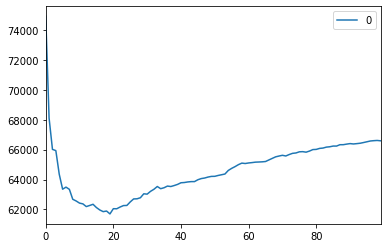

In [12]:
plot_curve = pd.DataFrame(all_error)
plot_curve.plot()


In [13]:
mini = all_error[0]
index = 0
for i in range(len(all_error)):
     if all_error[i]<mini :
            mini = all_error[i]
            index = i+1

print("The smallest value RMSE is ",mini," in index ",index)

The smallest value RMSE is  61697.05804906519  in index  20
